# Project: Investigating the Medical Appointment No Shows Dataset from Kaggle

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This analysis is about investigating a dataset on patients records that shows whether a patient shows up or not for their appointments. More details about the dataset can be found on [Kaggle](https://www.kaggle.com/datasets/joniarroba/noshowappointments)

The following questions are the ones I am looking forward to answering in this analysis:
 <ol>
     <li>What quick insights can be gotten from this data at a glance?</li> 
     <li>Does the age determine if the patient will showup for his or her appointment?</li>
     <li>Does the gender of the patient determine if they will showup for their appointments?</li>
     <li>Does having scholarship determine whether a patient will showup for their appointments?</li>
     <li>Does recieving messages of appointment determine whether a patient will showup for their appointments?</li>
     <li>Is there an association between the month and day and whether a patient shows up for their appointments?</li>
</ol>

In [1]:
import pandas as pd     #importing all necessary packages for this analysis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline   

import datetime as dt

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
df_noshowappointment_data = pd.read_csv("noshowappointments.csv") # Loading the data into the notebook for analysis.
                                                                  #   types and look for instances of missing or possibly errant data.
df_noshowappointment_data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df_noshowappointment_data.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [4]:
df_noshowappointment_data.shape

(110527, 14)

In [5]:
df_noshowappointment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
df_noshowappointment_data.isnull().sum() #checking for null values

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [7]:
sum(df_noshowappointment_data.duplicated()) #checking for duplicates

0

In [8]:
df_noshowappointment_data[['No-show']].value_counts() #checking for the different values in the variables
                                                    # No represents those who actually showed up for their appointment. 

No-show
No         88208
Yes        22319
dtype: int64

In [9]:
df_noshowappointment_data[['Gender']].value_counts()

Gender
F         71840
M         38687
dtype: int64

In [10]:
df_noshowappointment_data[['SMS_received']].value_counts() # 0 represents only one message received. 
                                                           # 1 represents more than one message received. 

SMS_received
0               75045
1               35482
dtype: int64

In [11]:
df_noshowappointment_data[['Neighbourhood']].value_counts()

Neighbourhood              
JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Length: 81, dtype: int64

In [12]:
df_noshowappointment_data.dtypes #checking for the data type

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

From the above cells under general properties, the data shows the records of patient appointments and other details in a 
hospital. The data contains 110,527 rows and 14 columns. Further inspection reveals that the data types in this particular 
dataset are float, integer and string (object). It also shows that there are no missing values or any duplicate in the dataset. 

### Data Cleaning 

From the above data wrangling process, there is the need to clean the data to ensure that it is in the right form for 
the analysis. The following cleaning steps will be done:
 <ol>
     <li>Convert 'ScheduledDay' variable datatype from string to datetime format</li> 
     <li>Convert 'AppointmentDay' variable datatype from string to datetime format</li>
     <li>Redefine 'No-show' variable to a more understandable format by replacing and renaming the values</li>
     <li>Drop 'PatientId','AppointmentID', 'Neighbourhood' because they are of less significance to this analysis</li>
     <li>Create 'Month' and 'Day' variables from the 'AppointmentDay' variable to use in answering one of the questions
    posed in the introduction</li>
</ol>

In [13]:
pd.to_datetime(df_noshowappointment_data['ScheduledDay'].astype(str))

0        2016-04-29 18:38:08+00:00
1        2016-04-29 16:08:27+00:00
2        2016-04-29 16:19:04+00:00
3        2016-04-29 17:29:31+00:00
4        2016-04-29 16:07:23+00:00
                    ...           
110522   2016-05-03 09:15:35+00:00
110523   2016-05-03 07:27:33+00:00
110524   2016-04-27 16:03:52+00:00
110525   2016-04-27 15:09:23+00:00
110526   2016-04-27 13:30:56+00:00
Name: ScheduledDay, Length: 110527, dtype: datetime64[ns, UTC]

In [14]:
pd.to_datetime(df_noshowappointment_data['AppointmentDay'].astype(str))

0        2016-04-29 00:00:00+00:00
1        2016-04-29 00:00:00+00:00
2        2016-04-29 00:00:00+00:00
3        2016-04-29 00:00:00+00:00
4        2016-04-29 00:00:00+00:00
                    ...           
110522   2016-06-07 00:00:00+00:00
110523   2016-06-07 00:00:00+00:00
110524   2016-06-07 00:00:00+00:00
110525   2016-06-07 00:00:00+00:00
110526   2016-06-07 00:00:00+00:00
Name: AppointmentDay, Length: 110527, dtype: datetime64[ns, UTC]

In [15]:
df_noshowappointment_data['AppointmentDay'] = df_noshowappointment_data['AppointmentDay'].astype('datetime64')

In [16]:
df_noshowappointment_data['AppointmentDay'].dtype

dtype('<M8[ns]')

In [17]:
df_noshowappointment_data.info()     #ScheduledDay and AppointmentDay have been changed from object datatype to timestamp.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  object        
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handcap         110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  No-show         110527 non-null  object        
dtypes: datetime64[ns](1), float64(1), in

The above variables have been converted from string to datetime because the proper format for variables containing date must
be datetime instead of strings.

In [18]:
#encoding the categorical no-show (No=1, Yes=0)
df_noshowappointment_data['No-show']=df_noshowappointment_data['No-show'].replace({'No':1,'Yes':0}) 

In [19]:
df_noshowappointment_data.rename(columns={'No-show': 'Showedup'}, inplace=True)

This is the variable I am interested in predicting. However the coding of the values seem a bit confusing so I decided to 
replace and rename the values to a more understable form.

In [20]:
df_noshowappointment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  object        
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handcap         110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  Showedup        110527 non-null  int64         
dtypes: datetime64[ns](1), float64(1), in

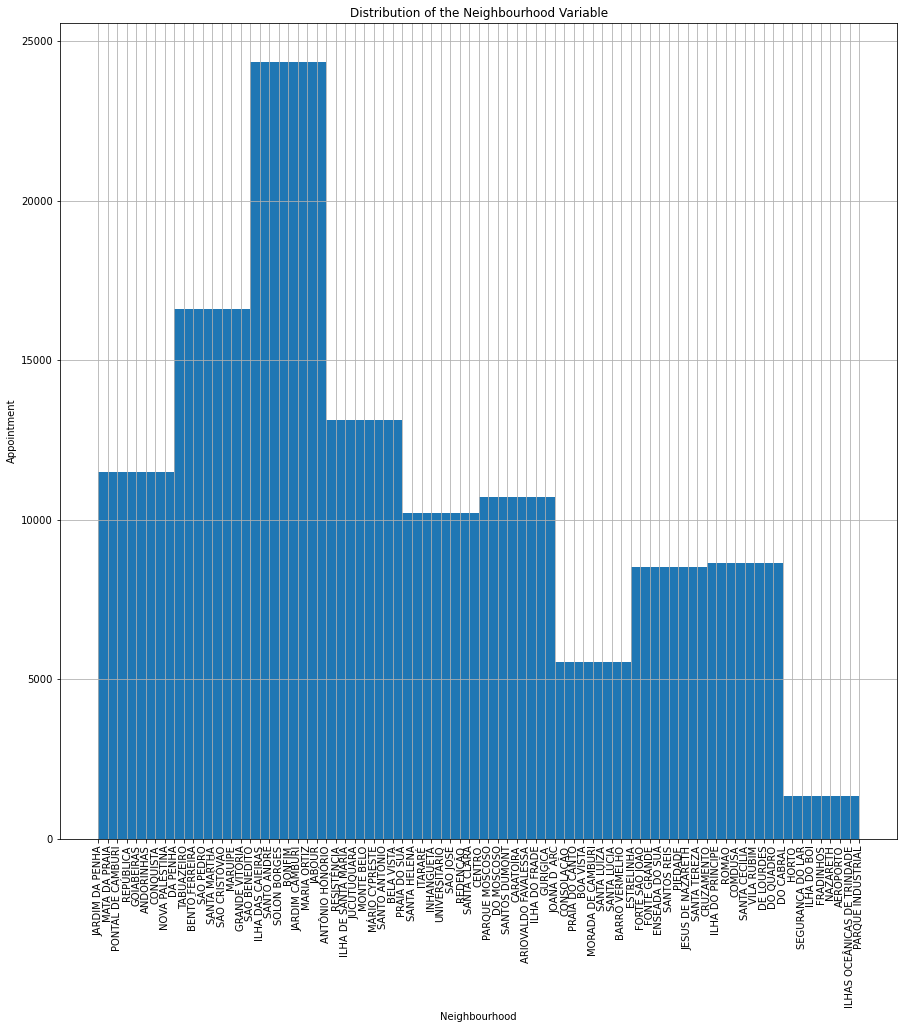

In [21]:
df_noshowappointment_data.Neighbourhood.hist(figsize = (15,15), xrot = 90.0, bins = 10)
plt.title("Distribution of the Neighbourhood Variable")
plt.xlabel('Neighbourhood')
plt.ylabel('Appointment'); 
                                                         #this variable will be dropped because I think there is no 
                                                         #relationshionship between it and showedup. 

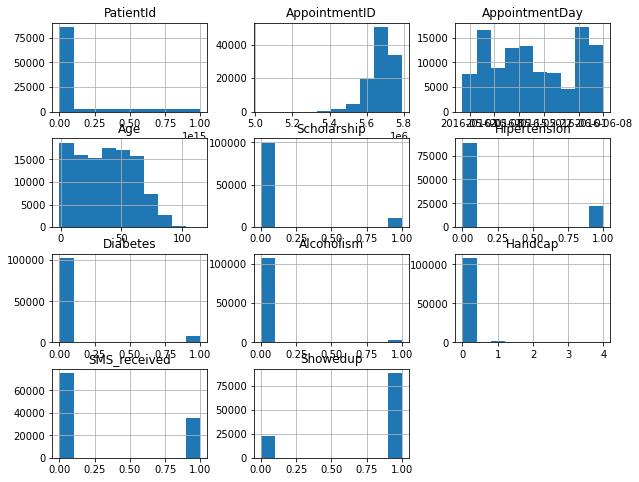

In [22]:
df_noshowappointment_data.hist(figsize=(10,8));    #using histogram to see the distribution of the variables

In [23]:
df_noshowappointment_data.drop(['PatientId','AppointmentID', 'Neighbourhood'], axis = 1, inplace = True)

The variables above does not seem to have any significance to the target variable hence my decision to drop them.

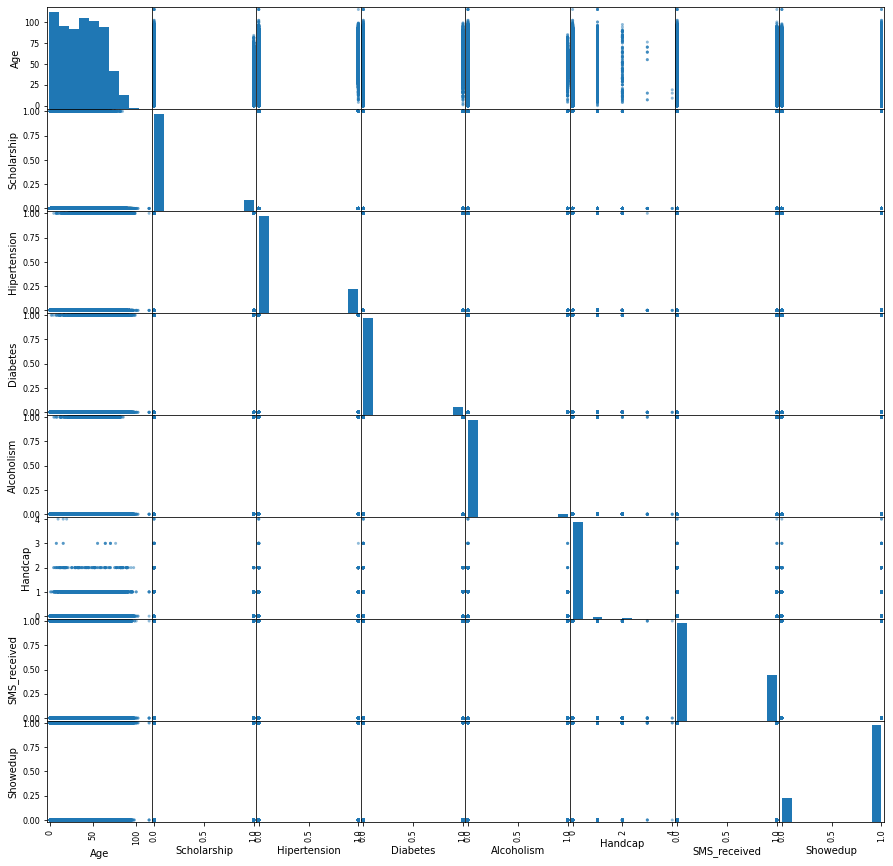

In [24]:
pd.plotting.scatter_matrix(df_noshowappointment_data, figsize = (15,15));  #using scatter matrix to show the 
                                                                           #relationship between variables. 

***Creating new columns from the AppointmentDay variable***

In [25]:
df_noshowappointment_data['Month'] = df_noshowappointment_data['AppointmentDay'].dt.month_name()
df_noshowappointment_data['Day'] = df_noshowappointment_data['AppointmentDay'].dt.day_name()

I created two extra variables that I belive will help me answer one of my analysis questions.

In [26]:
df_noshowappointment_data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showedup,Month,Day
0,F,2016-04-29T18:38:08Z,2016-04-29,62,0,1,0,0,0,0,1,April,Friday
1,M,2016-04-29T16:08:27Z,2016-04-29,56,0,0,0,0,0,0,1,April,Friday
2,F,2016-04-29T16:19:04Z,2016-04-29,62,0,0,0,0,0,0,1,April,Friday
3,F,2016-04-29T17:29:31Z,2016-04-29,8,0,0,0,0,0,0,1,April,Friday
4,F,2016-04-29T16:07:23Z,2016-04-29,56,0,1,1,0,0,0,1,April,Friday


<a id='eda'></a>
## Exploratory Data Analysis

***What quick insights can be gotten from this data at a glance?***

In [27]:
df_noshowappointment_data.describe() # this is used to get a quick summary statistics of the dataset.

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showedup
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.798067
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


From the statistics above, the average age that made appointments was about 37 years old, with majority falling in 
between 18 and 55. The eldest person that made appointment was 115 years old. About 80% number of patients who booked appoints showedup for their appointments on average. 


***Does the age determine if the patient will showup for his or her appointment?***

In [28]:
Showedup = df_noshowappointment_data.Showedup == True
DidnotShowup = df_noshowappointment_data.Showedup == False
df_noshowappointment_data.Age[Showedup].mean()

37.790064393252315

In [29]:
df_noshowappointment_data.Age[DidnotShowup].mean()

34.31766656212196

**Plotting a histogram to show this relationship visually**

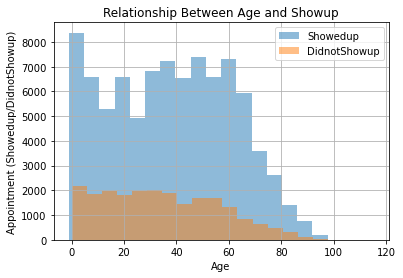

In [30]:
df_noshowappointment_data.Age[Showedup].hist(alpha=0.5, bins=20, label='Showedup')
df_noshowappointment_data.Age[DidnotShowup].hist(alpha=0.5, bins=20, label='DidnotShowup')
plt.title('Relationship Between Age and Showup')
plt.xlabel('Age')
plt.ylabel('Appointment (Showedup/DidnotShowup)')
plt.legend();
#Plt.show()

On average, those who showedup for their appointments were relatively older in their late 30's compared to those who did not
showup.

***Does the gender of the patient determine if they will showup for their appointments?***

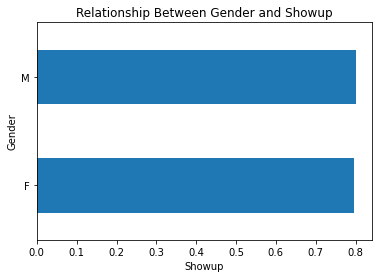

In [31]:
df_noshowappointment_data.groupby('Gender').Showedup.mean().plot(kind= 'barh')
plt.title('Relationship Between Gender and Showup')
plt.xlabel('Showup');

From the above visualisation, gender does not seem to have any impact as to whether a patient shows up or not for their 
appointments.

***Does having scholarship determine whether a patient will showup for their appointments?***

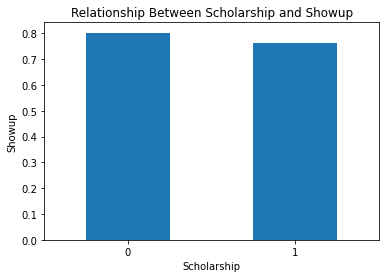

In [32]:
df_noshowappointment_data.groupby('Scholarship').Showedup.mean().plot(kind= 'bar', rot = 360)
plt.title('Relationship Between Scholarship and Showup')
plt.ylabel('Showup');

This shows that slightly more patients without scholarshp showedup for their appointments compared to those with 
scholarship (Bolsa familia)

***Does recieving messages of appointment determine whether a patient will showup for their appointments?***

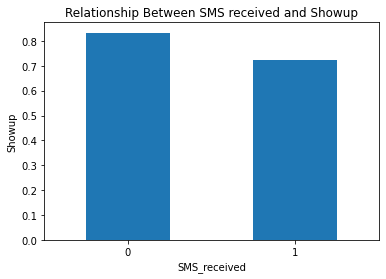

In [33]:
df_noshowappointment_data.groupby('SMS_received').Showedup.mean().plot(kind= 'bar', rot = 360)
plt.title('Relationship Between SMS received and Showup')
plt.ylabel('Showup');

From the visualisation above, receiving multiple messages does not seem to contribute much to whether a patient decide to
showup fo their appointments.

***Is there an association between the month and day and whether a patient shows up?***

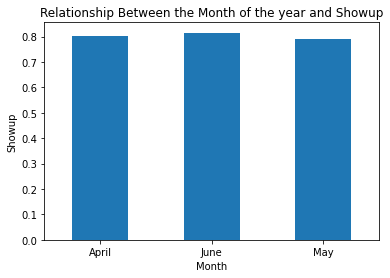

In [34]:
df_noshowappointment_data.groupby('Month')['Showedup'].mean().plot.bar(rot = 360)
plt.title('Relationship Between the Month of the year and Showup')
plt.ylabel('Showup');

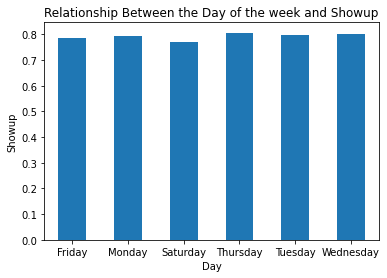

In [35]:
df_noshowappointment_data.groupby('Day')['Showedup'].mean().plot.bar(rot = 360)
plt.title('Relationship Between the Day of the week and Showup')
plt.ylabel('Showup');

From the above, there seem not to be much difference in the months in which patients showedup but with regard to the day, 
it seems that there are more patients showing up for their appointments on week days compared to that of the weekend (Saturday)

<a id='conclusions'></a>
## Conclusions

>In sum, about 80% of all patient appointments were attended from the analysis above. The factors that might have an association to patients showing up for their appointments are the age, scholarship, sms received and the day of appointments according to this analysis.

>Note however that these are not causation per say because there may still be other factors that are also contributing to this outcome instead of just these factors. 

>***Limitation:***
The main limitation I found with this dataset is the fact that it is not clear how many hospitals the data was gathered from hence I cannot use the data to make any generalised statements about patients and their hospital appointments. 


> The following list are the sources of information I consulted in the course of doing this assignment:
1. [Kaggle](https://www.kaggle.com/datasets/joniarroba/noshowappointments)
2. [wikipedia](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)
3. [stack overflow](https://stackoverflow.com/questions/70752606/how-to-convert-time-object-to-datetime-or-timestamp-data-type-in-p)
4. [Real Python Blog](https://realpython.com/python-keyerror/#:~:text=The%20Python%20KeyError%20is%20a,for%20could%20not%20be%20found.)
5. [Medium](https://medium.illumidesk.com/jupyter-notebook-little-known-tricks-b0866a558017)
6. [Data Carpentry](https://datacarpentry.org/python-ecology-lesson/04-data-types-and-format/)
7. [Ipython Documentation](https://ipython.readthedocs.io/en/stable/interactive/magics.html#line-magics)
8. [Free Codecamp](https://www.freecodecamp.org/news/python-print-type-of-variable-how-to-get-var-type/)
9. [Code from videos in the project walkthrough](https://classroom.udacity.com/nanodegrees/nd002-alg-t2/parts/cd0000/modules/a8411eaf-1cfb-40f1-a8e7-9678bf06e83d/lessons/ls0526/concepts/f41d3e13-9bbc-45a7-8e7e-14f9e5ba1607)
10.[Google](https://www.google.com/search?q=how+to+insert+emoji+in+jupyter+notebook&oq=how+to+add+emoji+in+jupyter&aqs=chrome.1.69i57j0i22i30j0i390l3.20407j0j7&sourceid=chrome&ie=UTF-8)

END🦋